<a href="https://colab.research.google.com/github/pear2jam/notebooks/blob/main/Houses_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_url = 'drive/MyDrive/Datasets/house_prices/'
train = pd.read_csv(data_url + "train.csv")
test = pd.read_csv(data_url + "test.csv")

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
target_train = train["SalePrice"]
train = train.drop(["Id", "SalePrice"], axis=1)
test = test.drop("Id", axis=1)

In [6]:
data0 = pd.concat([train, test])
data0 = data0.reset_index(drop=True)

In [7]:
data0.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
data_num = data0.select_dtypes(np.number)
num_columns = data_num.loc[:, data_num.isna().sum() > 0].columns
num_columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [9]:
data1 = data0.copy()

<h3> Knn imputations for numeric columns

In [10]:
def knn_impute(X, column):
  from sklearn.neighbors import KNeighborsRegressor
  reg = KNeighborsRegressor()

  
  X_num_temp = X.select_dtypes(np.number)
  X_num = X_num_temp.loc[:, X_num_temp.isna().sum() == 0]
  
  ind_fit = np.where(X[column].isna() == False)[0]
  ind_impute = np.where(X[column].isna())[0]
  reg.fit(X_num.iloc[ind_fit], X[column].iloc[ind_fit])

  pred = reg.predict(X_num.iloc[ind_impute])

  X.loc[X[column].isna() == True, column] = pred
  return X

In [11]:
for column in sorted([              
  'LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
],key = (lambda x: data1[x].isna().sum())):
  data1 = knn_impute(data1, column)

Now lets deal with each of non-numeric columns

In [12]:
data2 = data1.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder


def fill_mode(data, column):
  data[column].fillna(data[column].mode(dropna=True))
  return data

def fill_none(data, column):
  data[column].fillna("None")
  return data

def as_dummies(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
  data.drop(column, axis=1, inplace = True)
  return data

def as_labels(data, column):
  data[column] = LabelEncoder().fit_transform(np.array(data[column].values))
  return data

MSZoning

In [14]:
data2 = fill_mode(data2, "MSZoning")
data2 = as_dummies(data2, 'MSZoning')

Street

In [15]:
data2 = fill_mode(data2, "Street")
data2 = as_labels(data2, 'Street')

Alley

In [16]:

data2 = fill_none(data2, 'Alley')
data2 = as_dummies(data2, 'Alley')

LotShape

In [17]:
data2 = fill_mode(data2, 'LotShape')
data2 = as_labels(data2, 'LotShape')

LandContour

In [18]:
data2 = fill_mode(data2, 'LandContour')
data2 = as_labels(data2, 'LandContour')

Utilities

In [19]:
data2 = fill_mode(data2, 'Utilities')
data2 = as_labels(data2, 'Utilities')

LotConfig

In [20]:
data2 = fill_mode(data2, 'LotConfig')
data2 = as_dummies(data2, 'LotConfig')

LandSlope

In [21]:
data2 = fill_mode(data2, 'LandSlope')
data2 = as_labels(data2, 'LandSlope')

Neighborhood

In [22]:
data2 = fill_mode(data2, 'Neighborhood')
data2 = as_dummies(data2, 'Neighborhood')

Condition1, Condition2

In [23]:
data2 = fill_mode(data2, 'Condition1')
data2 = fill_mode(data2, 'Condition2')
data2 = as_dummies(data2, 'Condition1')
data2 = as_dummies(data2, 'Condition2')

BldgType

In [24]:
data2 = fill_mode(data2, 'BldgType')
data2 = as_labels(data2, 'BldgType')

HouseStyle

In [25]:
data2 = fill_mode(data2, 'HouseStyle')
data2 = as_labels(data2, 'HouseStyle')

RoofStyle

In [26]:
data2 = fill_mode(data2, 'RoofStyle')
data2 = as_dummies(data2, 'RoofStyle')

RoofMatl

In [27]:
data2 = fill_mode(data2, 'RoofMatl')
data2 = as_dummies(data2, 'RoofMatl')

Exterior1st, Exterior2nd


In [28]:
data2 = fill_mode(data2, 'Exterior1st')
data2 = fill_mode(data2, 'Exterior2nd')
data2 = as_dummies(data2, 'Exterior1st')
data2 = as_dummies(data2, 'Exterior2nd')

MasVnrType

In [29]:
data2 = fill_none(data2, 'MasVnrType')
data2 = as_dummies(data2, 'MasVnrType')

ExterQual, ExterCond

In [30]:
data2 = fill_mode(data2, 'ExterQual')
data2 = fill_mode(data2, 'ExterCond')
data2 = as_labels(data2, 'ExterQual')
data2 = as_labels(data2, 'ExterCond')

Foundation

In [31]:
data2 = fill_mode(data2, 'Foundation')
data2 = as_dummies(data2, 'Foundation')

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [32]:
data2 = fill_none(data2, 'BsmtQual')
data2 = fill_none(data2, 'BsmtCond')
data2 = fill_none(data2, 'BsmtExposure')
data2 = fill_none(data2, 'BsmtFinType1')
data2 = fill_none(data2, 'BsmtFinType2')

data2 = as_labels(data2, 'BsmtQual')
data2 = as_labels(data2, 'BsmtCond')
data2 = as_labels(data2, 'BsmtExposure')
data2 = as_labels(data2, 'BsmtFinType1')
data2 = as_labels(data2, 'BsmtFinType2')

Heating, HeatingQC

In [33]:
data2 = fill_mode(data2, 'Heating')
data2 = fill_mode(data2, 'HeatingQC')
data2 = as_dummies(data2, 'Heating')
data2 = as_labels(data2, 'HeatingQC')

CentralAir

In [34]:
data2 = fill_mode(data2, 'CentralAir')
data2 = as_labels(data2, 'CentralAir')

Electrical

In [35]:
data2 = fill_mode(data2, 'Electrical')
data2 = as_dummies(data2, 'Electrical')

KitchenQual, FireplaceQu, PoolQC

In [36]:
data2 = fill_mode(data2, 'KitchenQual')
data2 = fill_none(data2, 'FireplaceQu')
data2 = fill_none(data2, 'PoolQC')

data2 = as_labels(data2, 'KitchenQual')
data2 = as_labels(data2, 'FireplaceQu')
data2 = as_labels(data2, 'PoolQC')

Functional

In [37]:
data2 = fill_mode(data2, 'Functional')
data2 = as_labels(data2, 'Functional')

GarageType, GarageQual, GarageCond, GarageFinish

In [38]:
data2 = fill_none(data2, 'GarageType')
data2 = fill_none(data2, 'GarageQual')
data2 = fill_none(data2, 'GarageCond')
data2 = fill_none(data2, 'GarageFinish')

data2 = as_dummies(data2, 'GarageType')
data2 = as_labels(data2, 'GarageQual')
data2 = as_labels(data2, 'GarageCond')
data2 = as_labels(data2, 'GarageFinish')

PavedDrive

In [39]:
data2 = fill_mode(data2, 'PavedDrive')
data2 = as_labels(data2, 'PavedDrive')

Fence

In [40]:
data2 = fill_none(data2, 'Fence')
data2 = as_labels(data2, 'Fence')

MiscFeature

In [41]:
data2 = fill_none(data2, 'MiscFeature')
data2 = as_dummies(data2, 'MiscFeature')

SaleType

In [42]:
data2 = fill_mode(data2, 'SaleType')
data2 = as_dummies(data2, 'SaleType')

SaleCondition

In [43]:
data2 = fill_mode(data2, 'SaleCondition')
data2 = as_dummies(data2, 'SaleCondition')

In [44]:
data2.isna().sum().sum()

0

<h3>Adding extra features

In [45]:
data3 = data2.copy()

In [46]:
data3.shape

(2919, 206)

In [47]:
for col in num_columns:
  data3['log_' + col] = np.log1p(data3[col])

In [50]:
data3['SumSF'] = data3['TotalBsmtSF'] + data3['1stFlrSF'] + data3['2ndFlrSF']

In [51]:
data3.shape

(2919, 218)

<h3>Feature transformations

In [174]:
data4 = data3.copy()

In [175]:
num_columns = data4.select_dtypes(np.number).columns

In [176]:
data4[num_columns].skew().mean()

8.949946687573728

In [177]:
from scipy.special import boxcox1p
for column in num_columns:
  if np.abs(data4[column].skew()) > 0.5:
    data4[column] = boxcox1p(data4[column], 0.1)

In [178]:
data4[num_columns].skew().mean()

8.557218930467323

[]

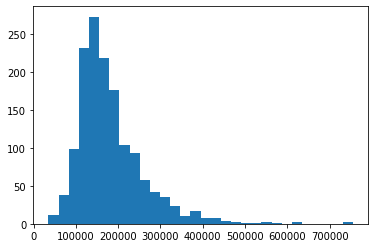

In [111]:
plt.hist(target_train, bins=30)
plt.plot()

In [112]:
y = np.log(target_train)

[]

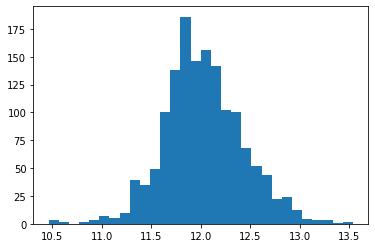

In [113]:
plt.hist(y, bins=30)
plt.plot()

<h3>Splitting, comparing models and prediction

In [179]:
data_train = data4.loc[0:target_train.shape[0]-1, :]
data_test = data4.loc[target_train.shape[0]:,]

<h3>Stacking


In [162]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

<h4>Lets compare base models

In [163]:
def cv(model):
  rmse = 'neg_root_mean_squared_error'
  score = -np.mean(cross_val_score(model, data_train, y, cv=5, scoring=rmse))
  return score

Catboost

In [164]:
cb_model = CatBoostRegressor(iterations=6500, early_stopping_rounds=200, eval_metric='RMSE', silent=True)
#cv(cb_model)
#0.11885457606170116

Xgboost

In [165]:
xgb_model = XGBRegressor(n_estimators = 2000, objective='reg:squarederror')
#cv(xgb_model)
#0.122

Lgbm

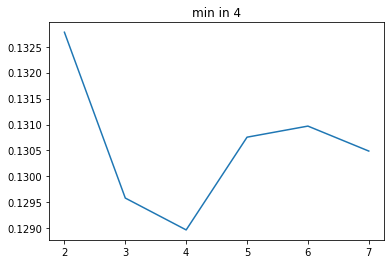

In [153]:
md_list = []
for i in range(2, 8):
  md_list.append(cv(LGBMRegressor(max_depth=i)))

plt.plot(range(2, 8), md_list)
plt.title(f'min in {np.argmin(np.array(md_list)) + 2}')
plt.show()

In [180]:
lgbm_model = LGBMRegressor(max_depth=4)
cv(lgbm_model)
#0.12891029577456803

0.12896748330562388

RandomForestRegressor

In [156]:
rand_forest_model = RandomForestRegressor(n_estimators=150)
cv(rand_forest_model)
#0.1415440312190957

0.1422426996479122

GradientBoostingRegressor

In [95]:
gb_model = GradientBoostingRegressor(n_estimators=700)
cv(gb_model)

0.12322034984755637

ElasticNet

In [232]:
best = 100
best_model = ElasticNet()

for l1_ratio in np.linspace(0.05, 0.95, 20):
  for alpha in [0.002, 0.005, 0.01, 0.02, 0.05, 0.075,
              0.1, 0.2, 0.4, 0.75, 1, 2, 3, 5, 10]:
    model = ElasticNet(l1_ratio=l1_ratio, alpha=alpha, tol=1e3)
    score = cv(model)

    if score < best:
      best = score
      best_model = model

print(f'l1_ratio is {best_model.l1_ratio}\n',
      f'alpha is {best_model.alpha}\n',
      f'score is {best}', sep='')

l1_ratio is 0.05
alpha is 0.05
score is 0.19828028592608676


In [182]:
elastic_model = ElasticNet(l1_ratio=0.05, alpha=0.05)
cv(elastic_model)
#0.13302627634498468

0.14181182718801583

Lasso

In [206]:
best = 100
best_model = Lasso()

for alpha in [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.075,
              0.1, 0.2, 0.4, 0.75, 1, 2, 3, 5, 10]:
  pass

for alpha in np.linspace(0, 0.002, 20):
  model = Lasso(alpha=alpha)
  score = cv(model)

  if score < best:
    best = score
    best_model = model

print(f'alpha is {best_model.alpha}\n',
      f'score is {best}', sep='')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.330e+00, tolerance: 1.891e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

alpha is 0.0004210526315789474
score is 0.12370458180099778


In [207]:
lasso_model = Lasso(alpha=0.0004, random_state=1)
cv(lasso_model)
#0.13517094811355032

0.12372798649137914

Ridge

In [104]:
best = 100
best_model = Ridge()

for alpha in [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000]:
  model = Ridge(alpha=alpha)
  score = cv(model)

  if score < best:
    best = score
    best_model = model

print(f'alpha is {best_model.alpha}\n',
      f'score is {best}', sep='')

alpha is 10
score is 0.13632747327380365


In [184]:
ridge_model = Ridge(alpha=10)
cv(ridge_model)
#0.1305210799355904

0.12702924996766105

BayesianRidge

In [186]:
bayes_model = BayesianRidge()
cv(bayes_model)

0.1268248098709172

SupportVectorMachine

In [185]:
svr_model = SVR()
cv(svr_model)

0.2903951331013015

Lets take 3 boostings and ElasticNet

In [208]:
cb_model.fit(data_train, y)
xgb_model.fit(data_train, y)
gb_model.fit(data_train, y)
bayes_model.fit(data_train, y)
lasso_model.fit(data_train, y)

Lasso(alpha=0.0004, random_state=1)

In [210]:
cb_pred = np.exp(cb_model.predict(data_test))
xgb_pred = np.exp(xgb_model.predict(data_test))
gb_pred = np.exp(gb_model.predict(data_test))
lasso_pred = np.exp(lasso_model.predict(data_test))
bayes_pred = np.exp(bayes_model.predict(data_test))

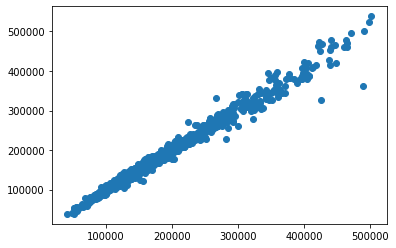

In [211]:
plt.scatter(cb_pred, xgb_pred)
plt.show()

In [212]:
pred = 0.55*cb_pred + 0.05*xgb_pred +0.3*lasso_pred+0.1*bayes_pred

In [213]:
max(pred)

498106.4649794614

In [215]:
submission = pd.concat([pd.Series(range(1461, 2920), name="Id"), pd.Series(pred, name='SalePrice')], axis=1)
submission.to_csv('drive/MyDrive/submission.csv', index=False, header=True)

(array([ 69., 380., 454., 268., 122.,  73.,  48.,  21.,  15.,   9.]),
 array([ 42847.37039668,  88373.27985496, 133899.18931324, 179425.09877152,
        224951.00822979, 270476.91768807, 316002.82714635, 361528.73660463,
        407054.64606291, 452580.55552118, 498106.46497946]),
 <a list of 10 Patch objects>)

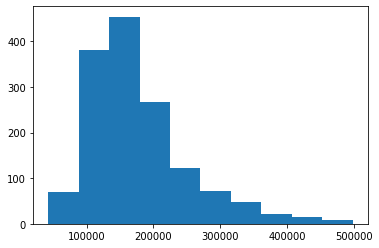

In [214]:
plt.hist(pred)